# ARCVIL CHURN PREDICTION

## 1. BUSINESS UNDERSTANDING

ArcVil is a telecommunication company that is US-based. Its aim is to provide efficient and affordable info-communication services to its customers. In recent years, the has been stiff competition in the telecommunication industry. Due to the many competitors offering various products in the telecommunication industry, customers have a variety of telecommunication options to chose from. Arcvil therefore wants to maintain its customers base. This is because, the cost of acquiring new customers is higher than the cost of maintaining them. When customers migrate to competitiors, Arcvil's profit is also affected. Management of Arcvil want a predictive model that can accurately predict customers who have the potential to churn

## 2. DATA UNDERSTANDING
The data used in this project was downloaded from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/discussion/235073) but it was for a prediction competition for [CrowdANALYTIX](https://www.crowdanalytix.com/contests/why-customer-churn). The dataset consists of one csv file. It contains 20 columns and  3333 records. Out of this 3333 record, there are 483 customers who churned and the remaining 2850 are non-churners.  The columns are:
-state                     
-account length           
-area code                
-phone number              
-international plan        
-voice mail plan           
-number vmail messages     
-total day minutes         
-total day calls           
-total day charge          
-total eve minutes         
-total eve calls           
-total eve charge          
-total night minutes       
-total night calls         
-total night charge        
-total intl minutes        
-total intl calls          
-total intl charge         
-customer service calls

## 3. DATA PREPARATION
The following process was followed in order to prepare our data for modeling:
-checked for duplicated or missing value (our data set did not contain any)
-derived new features (total charges) in order to get an overview of how much churner spend vs non-churners.
-preprocess data (this involved converting categorical data to appropriate format using LabelEncoder, normalsing the numerical columns using MinMax Scaler and oversampling our data using SMOTE to handle imbalances data between churners and non-churners).

## 4. EXPLORATORY DATA ANALYSIS

In [1]:
# IMPORTING LIBRARIES
#visialisation and mathematical operations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#evaluate model performance
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#for encoding and standardising data
from sklearn.preprocessing import LabelEncoder, StandardScaler

#classification algorithims
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#spliting data set and training on multiple data set
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#for balancing data
# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
# LOADING DATA
data = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# CHECKING FOR DATA TYPES
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Checking for missing values and duplicates

In [4]:
# CHECKING FOR MISSING VALUES
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
# CHECKING FOR DUPLICATED VALUES
data.duplicated().sum()

0

From the analysis above, there are no missing or duplicated values

### Removing unwanted columns and computing total charges

In [6]:
#COMPUTING TOTAL CHARGE INCURED BY CUSTOMERS
data['total charge'] = data['total day charge'] + data['total night charge']

In [7]:
#removing unncecessary features on the data
data = data.drop(columns = ['phone number','state'], axis = 1)
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,56.08
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,38.92
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,48.70
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,59.76
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,36.75


We have dropped the phone number and state columns for the following reasons:
- phone number does not help in predicting if a customer will churn and state was 
- state has many classes and encoding it with LabelEncoreder(our choice) will lead to issues with hierachy. We will maintain the area code that groups the states into the three categories

### Checking for distribution of data

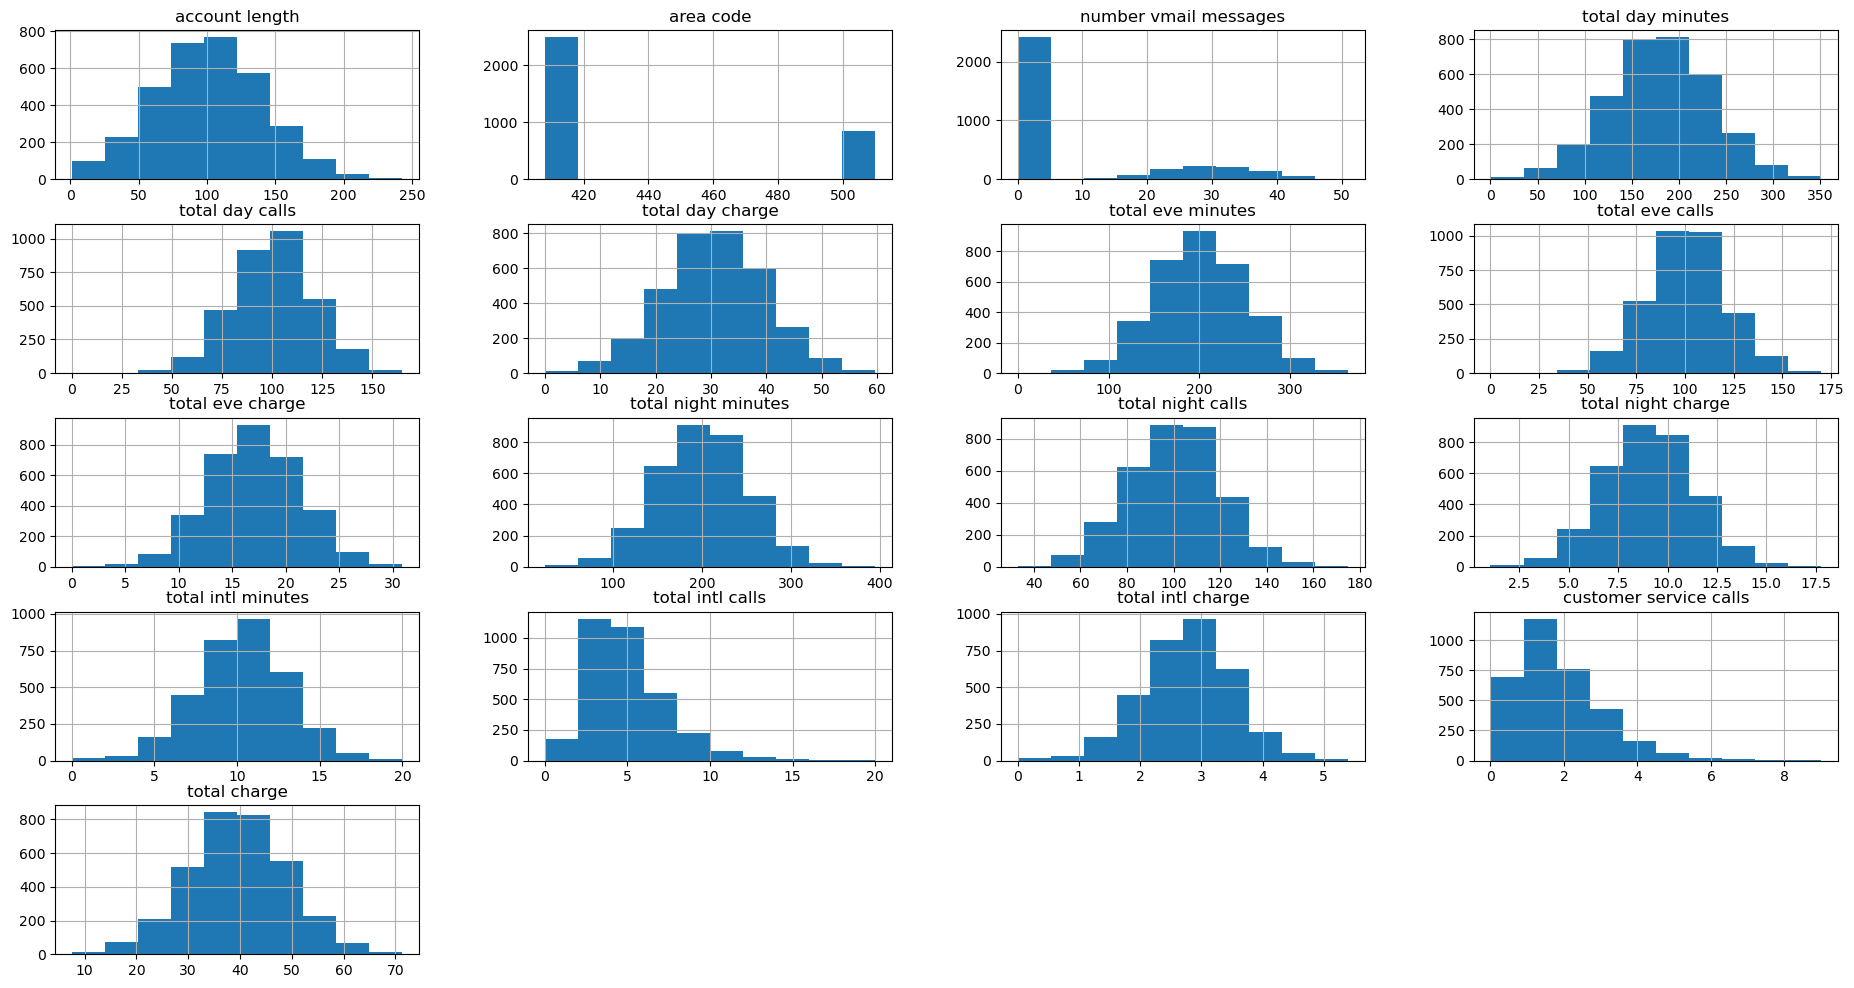

In [8]:
histograms = data.hist(figsize=(23,12))

From the histogram subplots, it can be noted that our data is not normally distributed for area code, number of voice mail messages, total day calls, total international calls, customer service call. 

The data will later undergo transformation in order to normalise it. 
This will assist our models to perform better. 

### ** Univariate Analysis

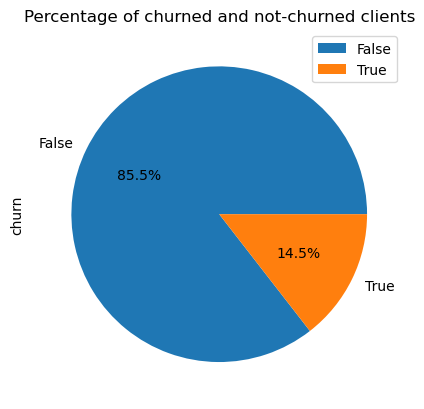

In [9]:
p = data['churn'].value_counts().to_frame()
plot = p.plot.pie(subplots=True, autopct='%1.1f%%')
plt.title("Percentage of churned and not-churned clients");


From the analysis above, it can be seen that 14.5% of their customers churned. From this analysis we note that the data is imbalanced (14% true for churned customers and 85% false for customers who have'nt churned. The data would need to be balanced inorder to improve model performance

### ** Mutlivariate Analysis

### Calculating mean of indepedent variables grouped by churn

In [10]:
data.groupby('churn').mean().T

churn,False,True
account length,100.793684,102.664596
area code,437.074737,437.817805
number vmail messages,8.604561,5.115942
total day minutes,175.175754,206.914079
total day calls,100.283158,101.335404
total day charge,29.780421,35.175921
total eve minutes,199.043298,212.410145
total eve calls,100.038596,100.561077
total eve charge,16.918909,18.054969
total night minutes,200.133193,205.231677


It can be noted that the total charges for those churned is higher than those who havent churned. Also, the number of customer service calls is more in those who churned

### Correlation between indepedent variables and target variable

In [11]:
data[data.columns[1:]].corr()['churn'][:].sort_values(ascending=False)

churn                     1.000000
customer service calls    0.208750
total charge              0.207487
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

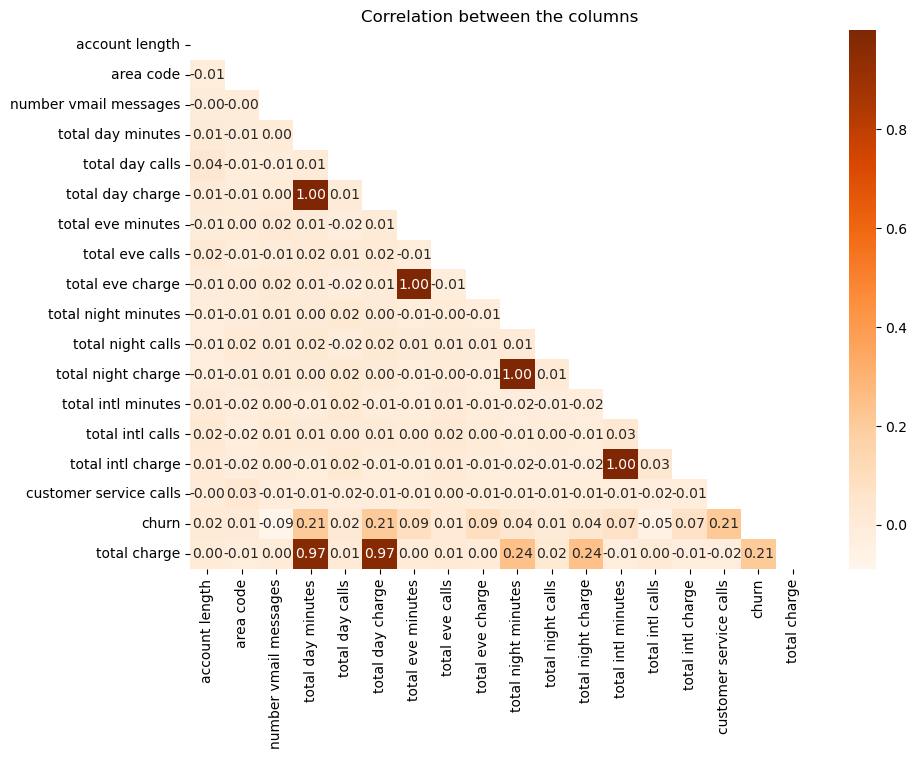

In [12]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(),annot=True,cmap='Oranges',fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

From the correlation matrix, it can be seen that there is weak positive correlation of the independent variables to the dependent variable (churn) with an exception of total intl calls and number vmail messages which have a strongly weak correlation. 

## 5. DATA PREPROCESSING

### Encoding categorical columns

In [13]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Encoding categorical columns
data['area code'] = labelencoder.fit_transform(data['area code'])
data['international plan'] = labelencoder.fit_transform(data['international plan'])
data['voice mail plan'] = labelencoder.fit_transform(data['voice mail plan'])
data['churn'] = labelencoder.fit_transform(data['churn'])

Since the data has categorical columns, they were encoded using LabelEncorder, which transfromed them into numbers. 

### Normalising data

In [14]:
# creating instance of MinMaxScaler
sc = MinMaxScaler()


#splitting dataframe into categorical and numeric
data_old = data[['area code','international plan','voice mail plan','churn']]

cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
        'total eve minutes','total eve charge','total eve calls', 'total night minutes' ,'total night calls',
        'total night charge', 'total intl minutes','total intl calls', 'total intl charge', 'customer service calls','total charge']

data_norm = data.drop(['area code','international plan','voice mail plan','churn'], axis=1)

#normalising data numeric dataframe
data_norm_sc = sc.fit_transform(data_norm)
data_norm_sc = pd.DataFrame(data_norm_sc)
data_norm_sc.columns = cols
data_norm_sc

#merging two dataframe (numeric and categorical)
data_new = pd.concat([data_old, data_norm_sc], axis=1)



In [15]:
#overview of dataframe after encoding and normalising
data_new.head()

,area code,international plan,voice mail plan,churn,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve charge,total eve calls,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total charge
0,1,0,1,0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.760771
1,1,0,1,0,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.491932
2,1,0,0,0,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.645151
3,0,1,0,0,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.818424
4,1,1,0,0,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.457935


### Data balancing using SMOTE

In [16]:
#splitting data into training and testing data
y = data_new['churn']
X = data_new.drop('churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 ,random_state=42)

In [17]:
#using SMOTE to balance the data. 
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)



## 6. MODELING

### Logistic Regression - Baseline model

### ** logistic regression before oversampling

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
# Instantiate the model
lr = LogisticRegression()
  
# Fit the model on the train set
lr.fit(X_train, y_train.ravel())
  
# Predictions on the testing set
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.19      0.28       143

    accuracy                           0.86      1000
   macro avg       0.71      0.58      0.60      1000
weighted avg       0.83      0.86      0.83      1000



### ** logistic regression after oversampling using SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [20]:
# Instantiate the model
lr1 = LogisticRegression()

# Fit the model on the train set
lr1.fit(X_train_res, y_train_res.ravel())

# Predictions on the testing set
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       857
           1       0.36      0.80      0.50       143

    accuracy                           0.77      1000
   macro avg       0.66      0.78      0.68      1000
weighted avg       0.87      0.77      0.80      1000



Class 0 is the majority class whereas class 1 is the minority class. From the results printed, it can be noted that the recall score and f1-score decreased after oversampling but the precion increased for class 0. On the other hand, for class 1, it can be noted that the recall score and f1-score increased and precision decreased after oversampling. This means that the model performance to correctly predict the minority class label is getting better by using SMOTE to balance the data. On the other hand, the model accuracy decreased after oversampling hence it is not performing better.

### ** finding hyperparameters for logistic regression

In [21]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_res, y_train_res)

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Others\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045895,0.016940,0.009106,0.007469,0.01,{'C': 0.01},0.672986,0.765957,0.699507,0.702842,...,0.710547,0.030539,6,0.674729,0.753865,0.697543,0.727895,0.695160,0.709839,0.027798
1,0.068040,0.004893,0.003200,0.003919,0.1,{'C': 0.1},0.741706,0.744681,0.724138,0.736434,...,0.738646,0.007991,5,0.733927,0.745207,0.744171,0.752179,0.737901,0.742677,0.006298
2,0.129536,0.017935,0.003124,0.006248,1,{'C': 1},0.746445,0.750000,0.724138,0.731266,...,0.744101,0.015534,4,0.751750,0.758813,0.746692,0.757783,0.749214,0.752851,0.004738
3,0.189972,0.064187,0.007849,0.006987,10,{'C': 10},0.748815,0.755319,0.733990,0.733850,...,0.748126,0.013247,3,0.753660,0.760668,0.749212,0.764010,0.751728,0.755856,0.005579
4,0.124741,0.023639,0.005641,0.004856,100,{'C': 100},0.748815,0.755319,0.736453,0.733850,...,0.749116,0.013544,1,0.753660,0.760668,0.749842,0.764633,0.754871,0.756735,0.005259
5,0.110151,0.013733,0.015620,0.000004,1000,{'C': 1000},0.748815,0.755319,0.736453,0.733850,...,0.749116,0.013544,1,0.753660,0.760668,0.749842,0.764633,0.754871,0.756735,0.005259


In [22]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.7491163849178645 at C = 100


#### logistic regression with optimal C

In [23]:
# Instantiate the model with best C
lr2 = LogisticRegression(C=100)

# Fit the model on the train set
lr2 = lr2.fit(X_train_res, y_train_res)

# Predictions on the testing set
predictions = lr2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85       857
           1       0.36      0.79      0.49       143

    accuracy                           0.77      1000
   macro avg       0.66      0.78      0.67      1000
weighted avg       0.87      0.77      0.80      1000



From the analysis, it can be noted that regularisation did not help the model perform any better. 

#### function to print confusion matrix and consolidated report

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score
import itertools

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_model_metrics(y_test,y_pred,model_name):
    #header(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    
    return df 

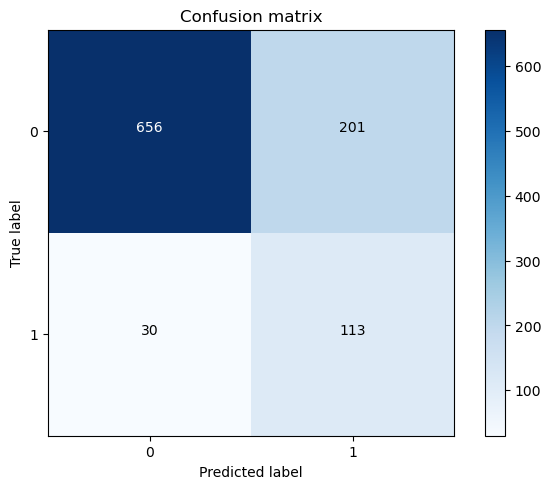

,Model,Accuracy,Precision,Recall,AUC,F1
0,LogisticRegression,0.77,0.79,0.36,0.78,0.49


In [25]:
print_model_metrics(y_test,predictions,"LogisticRegression")

### RandomForest Classifier

In [26]:
model2 = RandomForestClassifier()

#fitting the models
model2 = model2.fit(X_train_res, y_train_res) 
    
#predictions on the testing data
predictions2 = model2.predict(X_test) 
    
# print classification report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       857
           1       0.83      0.83      0.83       143

    accuracy                           0.95      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.95      0.95      0.95      1000



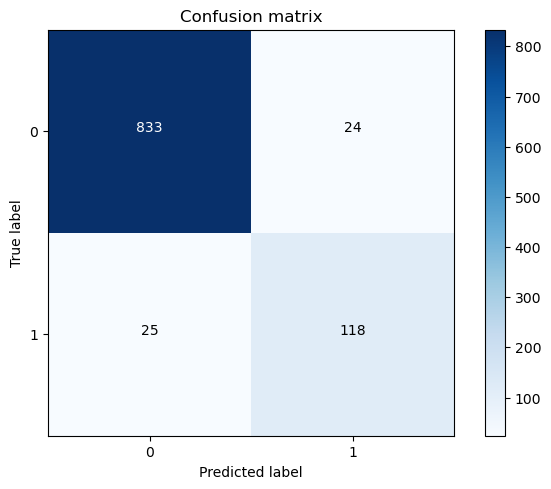

,Model,Accuracy,Precision,Recall,AUC,F1
0,RandomForest,0.95,0.83,0.83,0.9,0.83


In [27]:
# Print Accuracy
print_model_metrics(y_test,predictions2,"RandomForest")

### DecisionTree Classifier

In [28]:
model3 = DecisionTreeClassifier()

#fitting the models
model3 = model3.fit(X_train_res, y_train_res) 
    
#predictions on the testing data
predictions3 = model3.predict(X_test) 
    
# print classification report
print(classification_report(y_test, predictions3))


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       857
           1       0.58      0.75      0.65       143

    accuracy                           0.89      1000
   macro avg       0.77      0.83      0.79      1000
weighted avg       0.90      0.89      0.89      1000



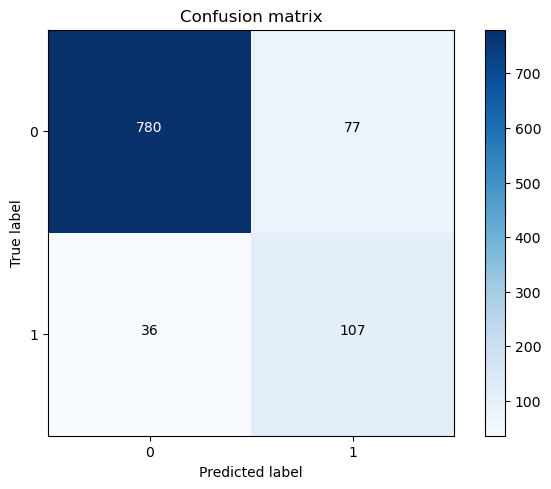

,Model,Accuracy,Precision,Recall,AUC,F1
0,DecisionTree,0.89,0.75,0.58,0.83,0.65


In [29]:
# Print Accuracy
print_model_metrics(y_test,predictions3,"DecisionTree")

## RandomForest Model Re-evaluation after turning using Regularisation Technique

From the three models above (logistic regression, random forest and decision tree), it can be noted that random forest performs better on our data set with an accuracy of 95%. Its recall, precision and f1-score values are even better for our data set.

### ** finding hyperparameters for RandomForest regression

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


def tune_hyperparameter(parameters,X_train_res, y_train_res,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(X_train_res, y_train_res)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

### ** using  hyperparameters to tune RandomForest regression

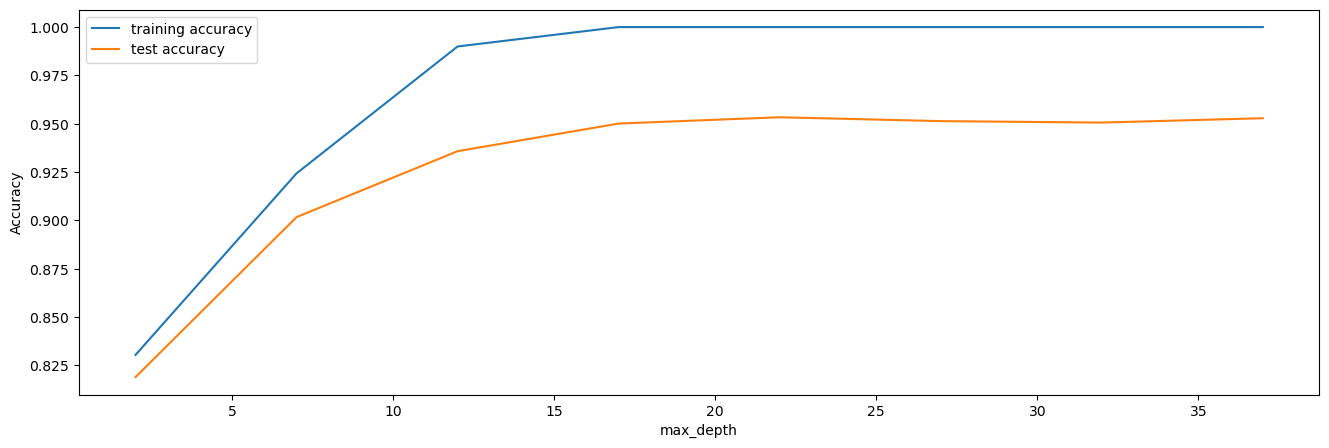

In [31]:
# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters,X_train_res, y_train_res)

It can be noted that as the value of max_depth increases, both train accuracy and test accuracy scores increase till a point they plateau. The ensemble overfits as the max_depth increases. To reduce overfitting, we need to control the depth of the constituent trees at the point where they converge which is around 12 and 17.

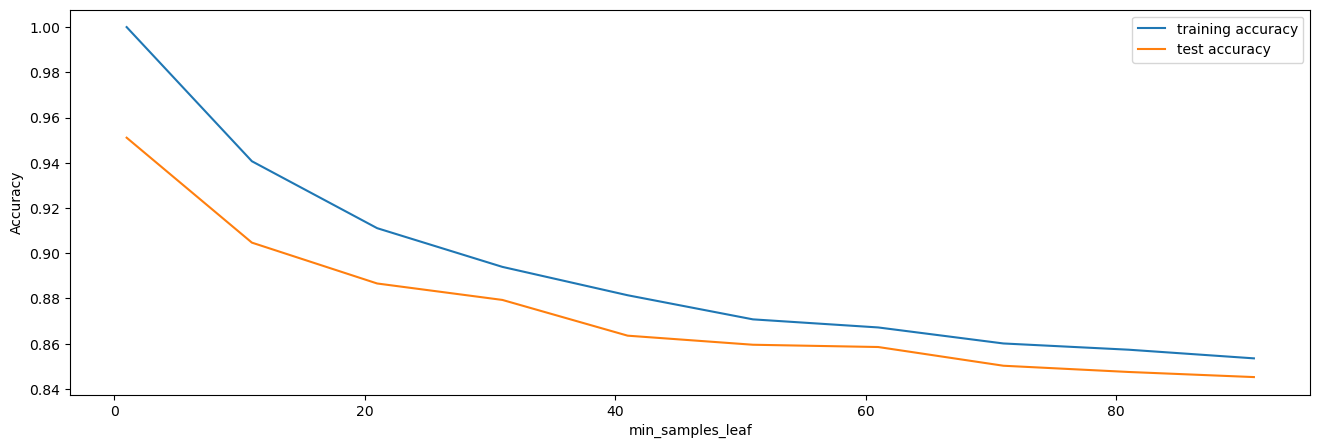

In [32]:
# parameters to build the model on
parameters2 = {'min_samples_leaf': range(1, 100, 10)}
tune_hyperparameter(parameters2,X_train_res, y_train_res)

### ** FINAL REGRESSION MODEL (TUNED WITH MAX DEPTH)

In [33]:
model2_new = RandomForestClassifier(max_depth=17,min_samples_leaf=12)

#fitting the models
model2_new = model2_new.fit(X_train_res, y_train_res) 
    
#predictions on the testing data
predictions2_new = model2_new.predict(X_test) 
    
# print classification report
print(classification_report(y_test, predictions2_new))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       857
           1       0.73      0.83      0.78       143

    accuracy                           0.93      1000
   macro avg       0.85      0.89      0.87      1000
weighted avg       0.94      0.93      0.93      1000



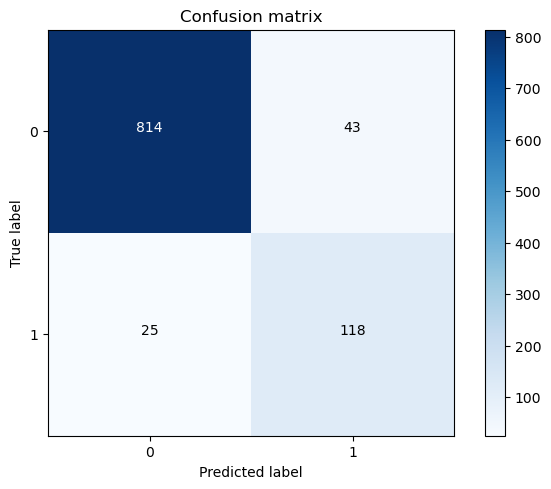

,Model,Accuracy,Precision,Recall,AUC,F1
0,Tuned RandomForest,0.93,0.83,0.73,0.89,0.78


In [34]:
# Printing confusion matrix
print_model_metrics(y_test,predictions2_new,'Tuned RandomForest')

After tuning the model, all its values slightly increased meaning that the model performed better 

###  finding which features affect the model

In [39]:
#importing library for feature importance
from sklearn.inspection import permutation_importance

In [43]:
perm_importance = permutation_importance(model2_new,X_train_res, y_train_res)

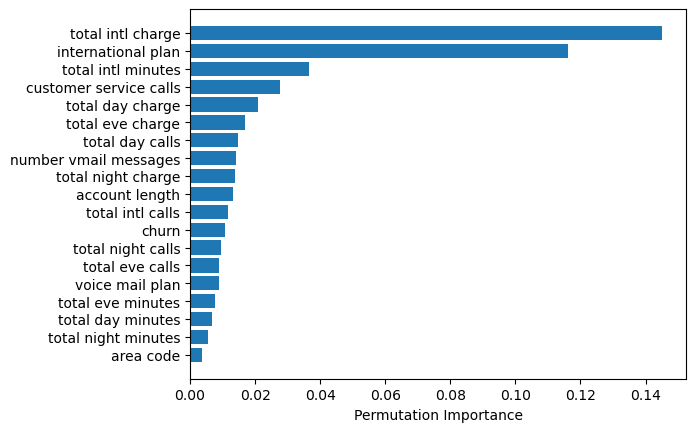

In [49]:
#ploting and sorting feature importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(data_new.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

From the analysis above, it can be noted that the top fivee features that are important in our prediction model are:
-total int charge
-international plan
-total intl minutes
-customer service calls
-total day charge
-total night charge
Other features are not important but not as much as this five which would influence the performance of the model.

## 7. CONCLUSION AND RECOMMENDATION

### Conclusion
When coming up with a classification model for customers who churn, random forest is the best algorithm. 
In order to determine the which customers would churn, the following data is important.
-total int charge
-international plan
-total intl minutes
-customer service calls
-total day charge
-total night charge

### Recommendation
-Arcvil should look into the charges incured by its customers as this could affect their decision to stay with them as a telecommunication company or move to their competitors. Arcvil should offer attractive packages inorder to retain their customers
-Arcvil should also take care of the customer service as it affects a customer's decision to stay or not.
